<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.3 - Central Limit Theorem

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# house_hold_csv = "Family Income and Expenditure.csv"
# Read CSV
household = pd.read_csv('../../DATA/Family_Income_and_Expenditure.csv')

In [4]:
# Head
household.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [5]:
# Tail
household.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# Shape
household.shape

(41544, 60)

In [6]:
household.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Household Income,41544.0,247555.584802,286880.522653,11285.0,104895.00,164079.5,291138.50,11815988.0
Total Food Expenditure,41544.0,85099.158194,51637.947682,2947.0,51017.25,72985.5,105635.50,827565.0
Agricultural Household indicator,41544.0,0.429858,0.676666,0.0,0.00,0.0,1.00,2.0
Bread and Cereals Expenditure,41544.0,25133.723642,13466.482984,0.0,16556.00,23324.0,31439.00,765864.0
Total Rice Expenditure,41544.0,18195.825005,11727.224350,0.0,11020.00,16620.0,23920.00,758326.0
Meat Expenditure,41544.0,10540.072574,10497.727757,0.0,3353.75,7332.5,14292.00,261566.0
Total Fish and marine products Expenditure,41544.0,10529.318337,7812.201613,0.0,5504.00,8695.0,13388.00,188208.0
Fruit Expenditure,41544.0,2550.474990,2969.752879,0.0,1024.75,1820.0,3100.00,273769.0
Vegetables Expenditure,41544.0,5006.918568,3300.175236,0.0,2873.00,4314.0,6304.25,74800.0
Restaurant and hotels Expenditure,41544.0,15436.566075,23705.195929,0.0,1930.00,7314.0,19921.25,725296.0


In [8]:
# Data Types
household.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_10028\3763386040.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:.0f}'.format(x) for x in xticks])
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_10028\3763386040.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.s

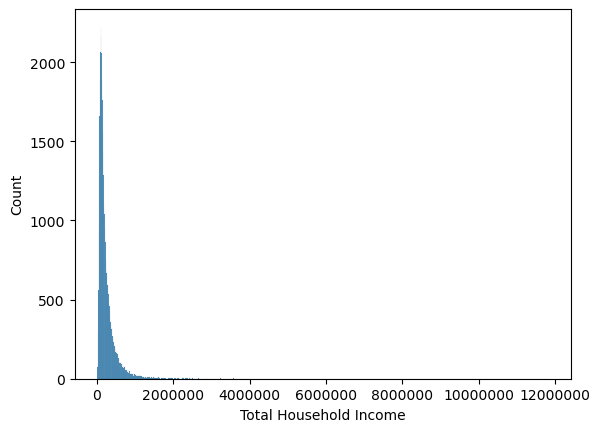

In [8]:
# ANSWER
sns.histplot(household['Total Household Income'])

ax = plt.gca()

xticks = ax.get_xticks()
yticks = ax.get_yticks()

ax.set_xticklabels(['{:.0f}'.format(x) for x in xticks])
ax.set_yticklabels(['{:.0f}'.format(y) for y in yticks])

plt.show()

##### 2. How would you describe the shape of this population?

**ANSWER:**

The Total Household Income data is right skewed, with extreme outliers far above the mean. 

##### 2. What is the mean income of this population?

In [10]:
# ANSWER

household['Total Household Income'].mean()

247555.58480165608

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

In [ ]:
# ANSWER

I would use the sample mean. 

**ANSWER:**


#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5.

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [11]:
# ANSWER
total_house_inc = household['Total Household Income']

sample1 = total_house_inc.sample(5)
sample2 = total_house_inc.sample(5)
sample3 = total_house_inc.sample(5)
sample4 = total_house_inc.sample(5)
sample5 = total_house_inc.sample(5)
sample6 = total_house_inc.sample(5)
sample7 = total_house_inc.sample(5)
sample8 = total_house_inc.sample(5)
sample9 = total_house_inc.sample(5)
sample10 = total_house_inc.sample(5)

###### 4.A Make a histogram of all the sample means

In [19]:
# ANSWER

def get_sample_means(num_samples, sample_size, dataset):
    sample_means = []
    for i in range(num_samples):
        sample = dataset.sample(sample_size)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    return sample_means

sample_means_5 = get_sample_means(10, 5, total_house_inc)
print(sample_means_5)

[252258.2, 265841.4, 344351.2, 376265.6, 463075.4, 98617.8, 159438.2, 325264.8, 192984.8, 258597.4]


C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


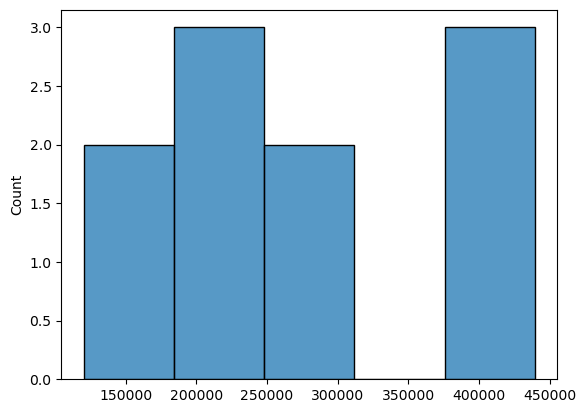

In [18]:
sns.histplot(sample_means_5)

plt.show()

###### 4.B Describe the shape of the histogram.

**ANSWER:**
The shape of the histogram of the means from 10 samples of size 5 is random.

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

In [21]:
# ANSWER

def get_sample_means(num_samples, sample_size, dataset):
    sample_means = []
    for i in range(num_samples):
        sample = dataset.sample(sample_size)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    return sample_means

sample_means_15 = get_sample_means(1000, 15, total_house_inc)
print(sample_means_15)

[192478.0, 241912.4, 221603.53333333333, 207284.0, 179273.06666666668, 293993.6, 321426.4, 154936.86666666667, 228825.0, 325701.4, 220259.8, 246472.33333333334, 309616.4666666667, 244509.4, 180003.86666666667, 158016.93333333332, 187629.4, 263414.3333333333, 170607.13333333333, 220438.06666666668, 226258.33333333334, 306315.4, 149055.06666666668, 216335.73333333334, 192362.26666666666, 254320.8, 154950.8, 246697.26666666666, 268448.73333333334, 299579.06666666665, 147574.06666666668, 409558.8, 236496.93333333332, 201491.93333333332, 205633.4, 235397.53333333333, 197861.13333333333, 236798.46666666667, 153806.0, 197717.13333333333, 260278.53333333333, 160882.8, 190483.0, 167309.2, 215906.66666666666, 382120.5333333333, 225431.33333333334, 207287.46666666667, 329799.4666666667, 267761.73333333334, 302654.4666666667, 183154.73333333334, 255370.13333333333, 321121.13333333336, 291097.3333333333, 207754.66666666666, 229350.93333333332, 211886.8, 229026.73333333334, 202314.66666666666, 12569

C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


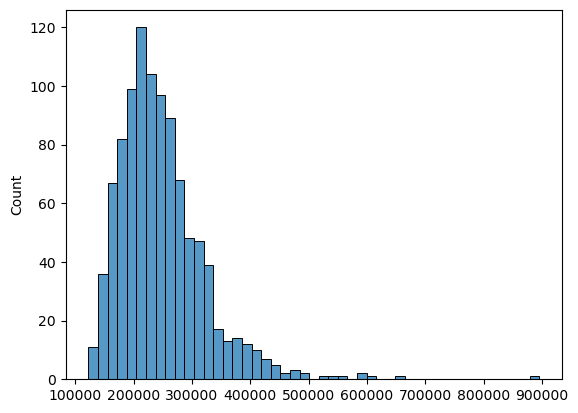

In [22]:
sns.histplot(sample_means_15)

plt.show()

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dinesh\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


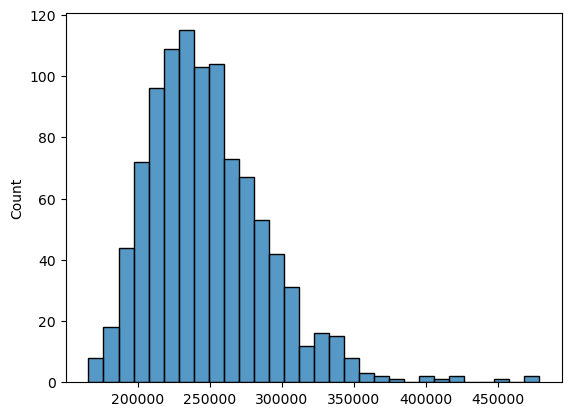

In [26]:
# ANSWER
def get_sample_means(num_samples, sample_size, dataset):
    sample_means = []
    for i in range(num_samples):
        sample = dataset.sample(sample_size)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    return sample_means

sample_means_50 = get_sample_means(1000, 50, total_house_inc)

sns.histplot(sample_means_50)
plt.show()

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**
The histogram of the means taken from 1000 samples with a size of 50 is right skewed, but a lot more representative of the population. 

###### 8.B What is mean of the distribution of sample means?

In [28]:
# ANSWER
sample_means_dist = pd.DataFrame(sample_means_50)
sample_means_dist.mean()

0    248257.51984
dtype: float64

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**

Yes, taking a large number of significantly sized samples showed that the mean of all the sample means was very close the the population mean.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



